In [ ]:
import os

In [ ]:
!pip install opendatasets
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 101.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=b4ab1d4a7d7b317024a4af0e096f6e4435f4119b47f75673a16a72383e8c9f9a
  Stored in directory: /tmp/pip-ephem-wheel-cache-oqf4s8n9/wheels/2b/af/a9/70bffa2773af622d2ebea9c8d407720b86e67bd40c465bf837
Successfully built kaggle
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  itsmerizwan


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 736M/736M [04:43<00:00, 2.72MB/s]


In [ ]:
!pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 2.3 MB/s eta 0:00:0000:0100:01


In [ ]:
!pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 769.7 kB/s eta 0:00:00a 0:00:01
   ━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import cv2
import glob
import albumentations as A
from pathlib import Path
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import InceptionResNetV2
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers,regularizers
from tensorflow.keras import callbacks

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dir='./eye-diseases-classification/dataset'

In [ ]:
def explore_files(dirpath):
  for dirpath,dir_names,file_names in os.walk(dirpath):
       print(f"There are {len(dir_names)} directories and {len(file_names)} images in '{dirpath}'.")
  print()

def get_file_types(filepath):
    exs=set(os.path.splitext(file)[1] for dirpath,dir_names,dir_files in os.walk(filepath) for file in dir_files)
    print("File extentions on image directory: ", exs)

def process_img(filepath):
   jpg_files=list(Path(filepath).glob('**/*.jpg'))
   png_files=list(Path(filepath).glob(f'**/*.png'))
   jpeg_files=list(Path(filepath).glob(f'**/*.jpeg'))
   #concat all files
   all_files=jpg_files+png_files+jpeg_files
   labels=list(map(lambda x:os.path.split(os.path.split(x)[0])[1],all_files))
   print(len(labels))
   #make dataframe
   Files=pd.Series(all_files,name='Filepath').astype(str)
   Labels=pd.Series(labels,name='Labels').astype(str)
   data=pd.concat([Files,Labels],axis=1)
   return data

In [ ]:
explore_files(dir)
get_file_types(dir)
df=process_img(dir)

There are 4 directories and 0 images in './eye-diseases-classification/dataset'.
There are 0 directories and 1098 images in './eye-diseases-classification/dataset/diabetic_retinopathy'.
There are 0 directories and 1074 images in './eye-diseases-classification/dataset/normal'.
There are 1 directories and 1038 images in './eye-diseases-classification/dataset/cataract'.
There are 0 directories and 1 images in './eye-diseases-classification/dataset/cataract/.ipynb_checkpoints'.
There are 0 directories and 1007 images in './eye-diseases-classification/dataset/glaucoma'.

File extentions on image directory:  {'.png', '.jpeg', '.jpg'}
4218


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  4218 non-null   object
 1   Labels    4218 non-null   object
dtypes: object(2)
memory usage: 66.0+ KB


In [ ]:
df.duplicated().sum()

0

/tmp/ipykernel_2980680/3003250797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels.index,y=labels.values,palette=custom_palette)
/tmp/ipykernel_2980680/3003250797.py:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=labels.index,y=labels.values,palette=custom_palette)


Text(0.5, 1.0, 'Distribution of labels')

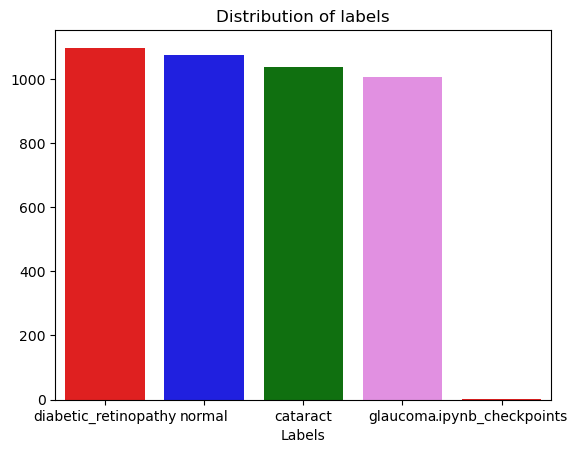

In [ ]:
labels=df['Labels'].value_counts()
custom_palette = sns.color_palette(["red", "blue", "green", "violet"])
sns.barplot(x=labels.index,y=labels.values,palette=custom_palette)
plt.title('Distribution of labels')

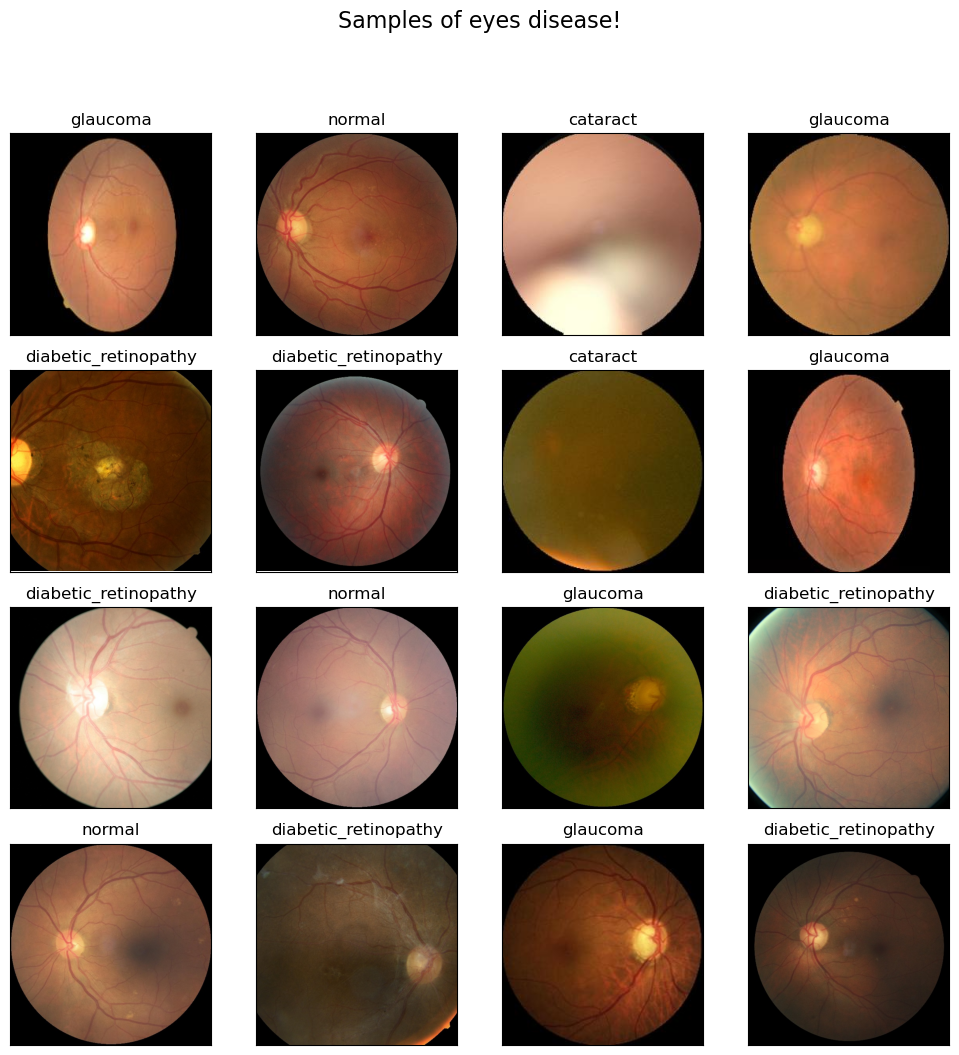

In [ ]:
def show_image_sample(df):
    random_data = df.sample(n=16)
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
    plt.suptitle('Samples of eyes disease!', y=1.05, fontsize=16)

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(random_data.iloc[i].Filepath))
        ax.set_title(random_data.iloc[i].Labels)
    plt.tight_layout()
    plt.show()

show_image_sample(df)

In [ ]:
import os
from pathlib import Path
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load the image directory
img_dir = './eye-diseases-classification/dataset'

# Initialize an empty dictionary to store the number of files in each folder
folder_sizes = {}

try:
    # List the subdirectories (classes) in the main directory
    subdirs = [d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))]

    # Count the number of image files in each subdirectory
    for subdir in subdirs:
        dir_path = os.path.join(img_dir, subdir)
        try:
            num_files = len(list(Path(dir_path).glob('**/*.jpg')) + list(Path(dir_path).glob('**/*.png')) + list(Path(dir_path).glob('**/*.jpeg')))
            folder_sizes[subdir] = num_files
        except Exception as e:
            logger.error(f"Error counting files in {subdir}: {str(e)}")

except Exception as e:
    logger.error(f"Error reading directory: {str(e)}")

# Print the number of files in each folder
for folder, size in folder_sizes.items():
    print(f"Folder: {folder}, Number of files: {size}")

# Print the total number of files
total_files = sum(folder_sizes.values())
print(f"Total number of files: {total_files}")

Folder: diabetic_retinopathy, Number of files: 1098
Folder: normal, Number of files: 1074
Folder: cataract, Number of files: 1039
Folder: glaucoma, Number of files: 1007
Total number of files: 4218


In [ ]:
def apply_clahe(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final


In [ ]:
def apply_gaussian_blur(img):
    return cv2.GaussianBlur(img, (5,5), 0)


In [ ]:
def apply_image_binarization(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply binarization
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Convert binary image back to 3-channel image
    binary_3ch = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)
    return binary_3ch

In [ ]:
def apply_green_channel_extraction(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    return a

def apply_picture_smoothing(img):
    return cv2.GaussianBlur(img, (5,5), 0)

def apply_image_sharpening(img):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

def apply_image_edge_enhancement(img):
    return cv2.Canny(img, 100, 200)

def apply_bilinear_interpolation(img):
    return cv2.resize(img, (img.shape[1]*2, img.shape[0]*2), interpolation=cv2.INTER_LINEAR)


In [ ]:
def preprocess_images(img_files, img_width, img_height):
    preprocessed_imgs = []
    for img_file in img_files:
        img = cv2.imread(img_file)
        img = cv2.resize(img, (img_width, img_height))
        img = apply_clahe(img)
        img = apply_gaussian_blur(img)
        img = apply_image_binarization(img)
        img = apply_green_channel_extraction(img)
        img = apply_picture_smoothing(img)
        img = apply_image_sharpening(img)
        img = apply_image_edge_enhancement(img)
        img = apply_bilinear_interpolation(img)
        preprocessed_imgs.append(img)
    return preprocessed_imgs

In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from collections import defaultdict  # Import defaultdict here

img_dir = './eye-diseases-classification/dataset'
class_folders = {
    'diabetic_retinopathy': os.path.join(img_dir, 'diabetic_retinopathy'),
    'cataract': os.path.join(img_dir, 'cataract'),
    'normal': os.path.join(img_dir, 'normal'),
    'glaucoma': os.path.join(img_dir, 'glaucoma'),
}
print(class_folders)
# Gather image file paths
img_files = []
img_labels = []
image_counts = defaultdict(int)

for label, folder in class_folders.items():
    files = list(Path(folder).glob('**/*.jpg')) + list(Path(folder).glob('**/*.png')) + list(Path(folder).glob('**/*.jpeg'))
    img_files.extend(files)
    img_labels.extend([label] * len(files))
    image_counts[label] = len(files)

# Convert to string format
img_files = [str(file) for file in img_files]

# Step 4: Print counts and show one image from each class
print("Image counts in each class:")
for label, count in image_counts.items():
    print(f"{label}: {count} images")


{'diabetic_retinopathy': './eye-diseases-classification/dataset/diabetic_retinopathy', 'cataract': './eye-diseases-classification/dataset/cataract', 'normal': './eye-diseases-classification/dataset/normal', 'glaucoma': './eye-diseases-classification/dataset/glaucoma'}
Image counts in each class:
diabetic_retinopathy: 1098 images
cataract: 1039 images
normal: 1074 images
glaucoma: 1007 images


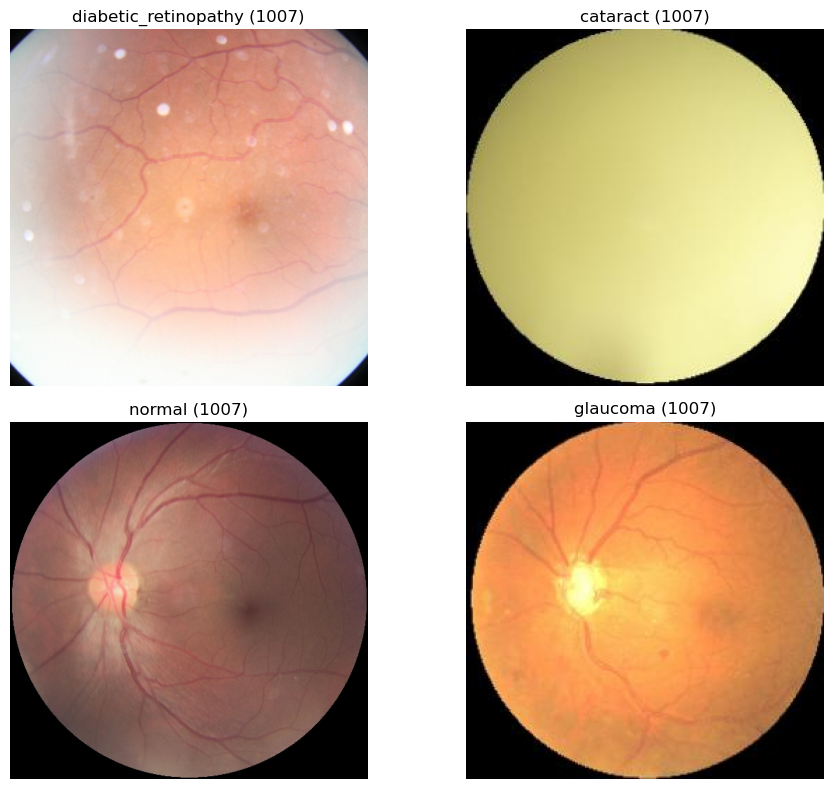

In [ ]:
# Display one image from each class
plt.figure(figsize=(10, 8))
for i, (label, folder) in enumerate(class_folders.items()):
    files = list(Path(folder).glob('**/*.jpg')) + list(Path(folder).glob('**/*.png')) + list(Path(folder).glob('**/*.jpeg'))
    if files:  # Check if there are any files in the folder
        img_path = str(files[0])  # Get one image path
        img = plt.imread(img_path)
        plt.subplot(2, 2, i + 1)  # Create a subplot
        plt.imshow(img)
        plt.title(f"{label} ({count})")  # Show the class name and count
        plt.axis('off')

plt.tight_layout()
plt.show()

# Step 5: Preprocess images
IMG_WIDTH, IMG_HEIGHT = 299, 299  # Size for InceptionResNetV2
preprocessed_imgs = preprocess_images(img_files, IMG_WIDTH, IMG_HEIGHT)


In [ ]:
import numpy as np

# Data augmentation code...
datagen = ImageDataGenerator(rotation_range=5, width_shift_range=0.05, height_shift_range=0.05)

augmented_images = []
augmented_labels = []

for img_file, label in zip(preprocessed_imgs, img_labels):
    img = cv2.imread(img_file)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = np.expand_dims(img, 0)  # Add a batch dimension

    for _ in range(3):  # 3 augmentations per image
        for aug_img in datagen.flow(img, batch_size=1):
            augmented_images.append(aug_img[0].astype('uint8'))  # Convert back to uint8
            augmented_labels.append(label)
            break

# Convert to NumPy arrays for verification
augmented_images_array = np.array(augmented_images)
augmented_labels_array = np.array(augmented_labels)

# Shape checking
print("Augmented Images shape:", augmented_images_array.shape)
print("Augmented Labels shape:", augmented_labels_array.shape)

# Match count check
if augmented_images_array.shape[0] != augmented_labels_array.shape[0]:
    print("Mismatch in number of images and labels!")
else:
    print("Number of images and labels match:", augmented_images_array.shape[0])



Augmented Images shape: (12654, 299, 299, 3)
Augmented Labels shape: (12654,)
Number of images and labels match: 12654


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

X_train, X_val, y_train, y_val = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42, stratify=augmented_labels)

# Step 8: Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Step 9: Define and compile model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(class_folders), activation='softmax')(x)  # Output layer for classification (4 classes)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Augmented Images shape:", augmented_images.shape if hasattr(augmented_images, 'shape') else len(augmented_images))
print("Augmented Labels shape:", augmented_labels.shape if hasattr(augmented_labels, 'shape') else len(augmented_labels))



2024-10-14 14:44:44.364114: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 84s 0us/step
Augmented Images shape: 12654
Augmented Labels shape: 12654


In [ ]:
checkpoint = callbacks.ModelCheckpoint('eyesmodel.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=8, mode='min')

# Step 11: Train the model
history = model.fit(
    np.array(X_train),
    y_train_encoded,
    validation_data=(np.array(X_val), y_val_encoded),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, checkpoint]
)

# After training, you can save the model and any other necessary data for future use.
model.save('final_model.keras')

Epoch 1/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8249 - loss: 0.4660
Epoch 1: val_loss improved from inf to 0.76630, saving model to eyesmodel.keras
317/317 ━━━━━━━━━━━━━━━━━━━━ 1062s 3s/step - accuracy: 0.8251 - loss: 0.4655 - val_accuracy: 0.8771 - val_loss: 0.7663
Epoch 2/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9314 - loss: 0.1894
Epoch 2: val_loss improved from 0.76630 to 0.16870, saving model to eyesmodel.keras
317/317 ━━━━━━━━━━━━━━━━━━━━ 995s 3s/step - accuracy: 0.9314 - loss: 0.1895 - val_accuracy: 0.9403 - val_loss: 0.1687
Epoch 3/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9524 - loss: 0.1350
Epoch 3: val_loss did not improve from 0.16870
317/317 ━━━━━━━━━━━━━━━━━━━━ 989s 3s/step - accuracy: 0.9524 - loss: 0.1350 - val_accuracy: 0.9040 - val_loss: 0.2607
Epoch 4/20
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9578 - loss: 0.1238
Epoch 4: val_loss did not improve from 0.16870
317/317 ━━━━━━━━━━━━━━━━━━━━ 987s 3s/step - acc

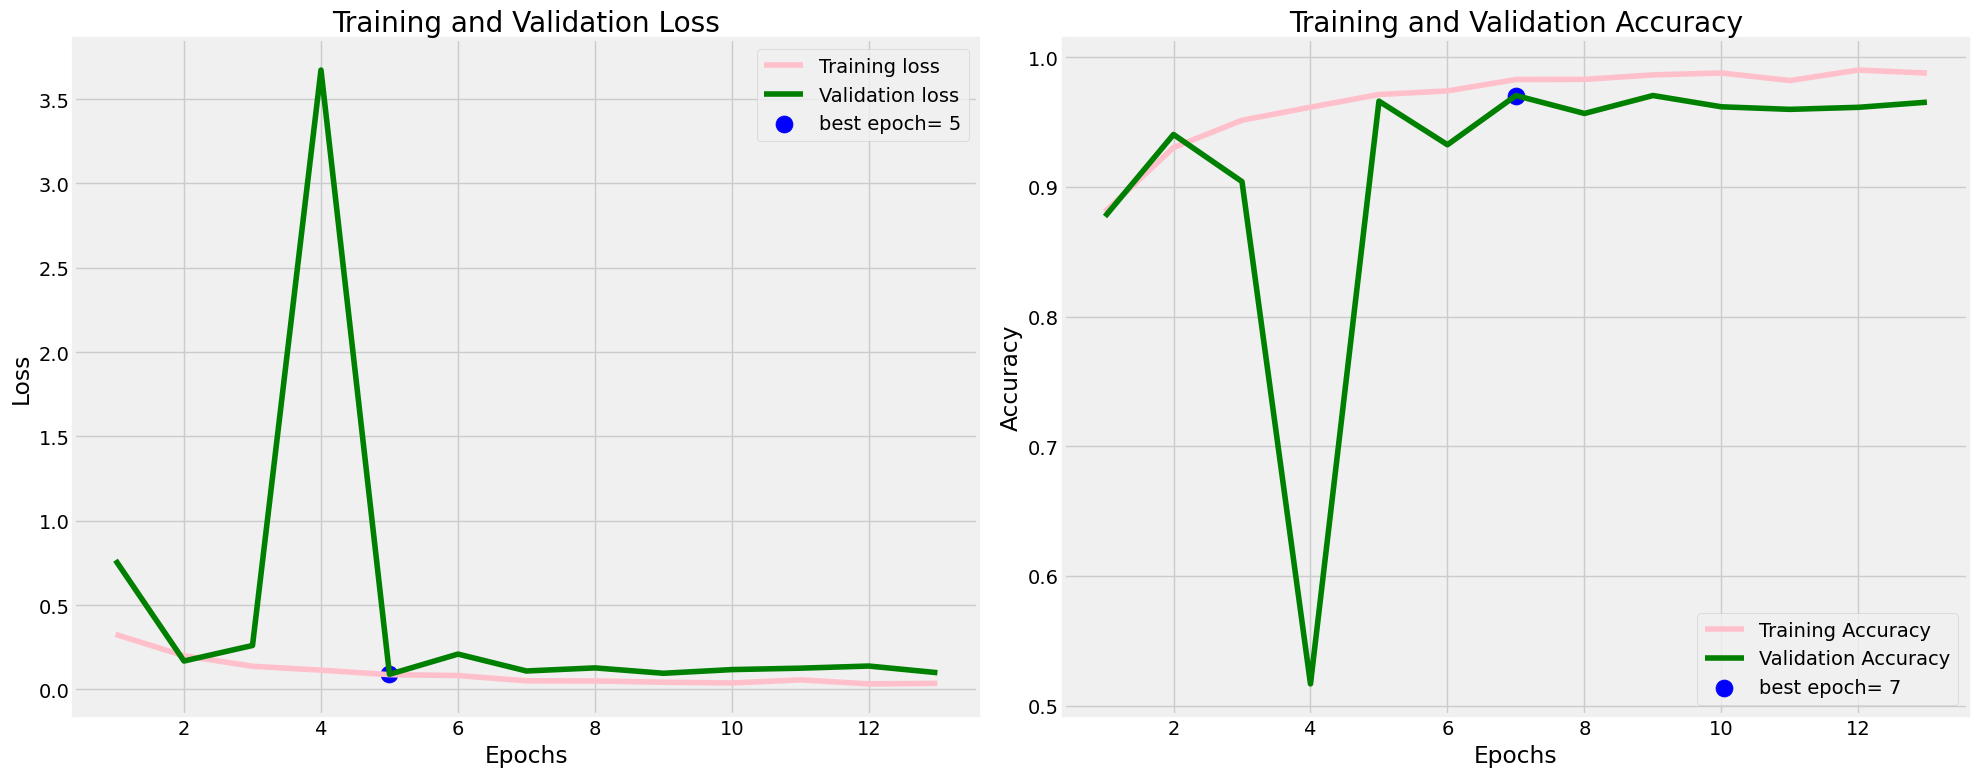

In [ ]:
# Show Model Performance
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'pink', label='Training loss')
plt.plot(Epochs, val_loss, 'green', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'pink', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'green', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate The Model
train_score = model.evaluate(np.array(X_train), y_train_encoded, verbose=1)
valid_score = model.evaluate(np.array(X_val), y_val_encoded, verbose=1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

317/317 ━━━━━━━━━━━━━━━━━━━━ 257s 810ms/step - accuracy: 0.9842 - loss: 0.0454
80/80 ━━━━━━━━━━━━━━━━━━━━ 65s 818ms/step - accuracy: 0.9696 - loss: 0.0974
Train Loss:  0.04915241524577141
Train Accuracy:  0.9834040999412537
--------------------
Validation Loss:  0.09931254386901855
Validation Accuracy:  0.9652311205863953
--------------------


In [ ]:
# Make predictions on validation set
y_pred = model.predict(np.array(X_val))
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_val_encoded, y_pred_classes, target_names=label_encoder.classes_))


80/80 ━━━━━━━━━━━━━━━━━━━━ 76s 885ms/step
                      precision    recall  f1-score   support

            cataract       0.99      0.97      0.98       623
diabetic_retinopathy       0.99      1.00      1.00       659
            glaucoma       0.99      0.90      0.94       604
              normal       0.90      0.98      0.94       645

            accuracy                           0.97      2531
           macro avg       0.97      0.96      0.96      2531
        weighted avg       0.97      0.97      0.97      2531



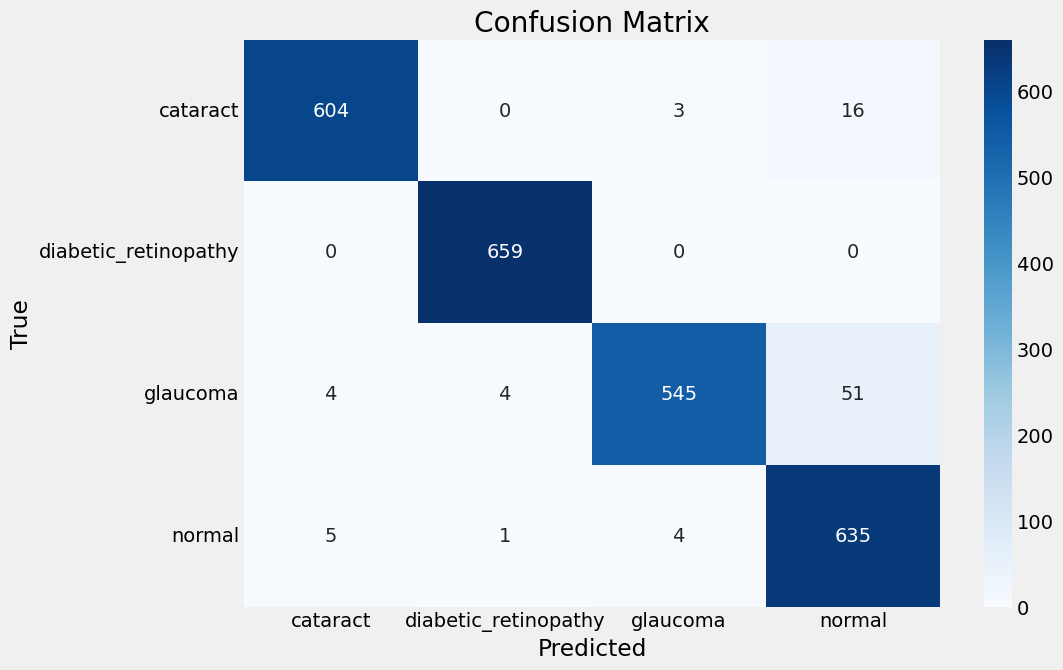

In [ ]:
def display_conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

    # Set the labels and title
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()

display_conf_matrix(y_val_encoded, y_pred_classes)